# Chebyshev center of a polyhedron

Consider the problem of finding the largest Euclidean ball that lies inside a polyhedron
		$$P = \{x \in \mathbb{R}^n \mid a_i^T x \le b_i, i=1,\ldots,m\}. $$
        
In the lecture, we showed that it can be modelled by the following LP:

$$\begin{array}{ll@{\quad}l}
\text{maximize}  & r &\\
\text{subject to}& a_i^Tx_c+r\|a_i\|_2 \le b_i & \text{for $i=1,\ldots,m$}
\end{array}$$

Code this model in Gurobi. Then test it in 2D so that it finds the center of a polygon given by a list of vertices.

In [3]:
from gurobipy import Model, GRB

vertices = [(0,0), (2,0), (2/3,2+2/3), (-4/3, 2/3)]

# ... code and solve the model using Gurobi

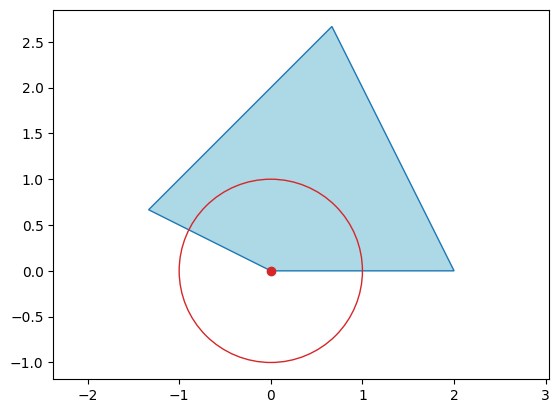

<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
xs, ys = zip(*(vertices + [vertices[0]])) #create lists of x and y values

plt.figure()
plt.axis('equal')
plt.fill(xs,ys,facecolor='lightblue', edgecolor='tab:blue', linewidth=1) 
cir=plt.Circle((0, 0), 1, fill=False, edgecolor='tab:red')
plt.gca().add_patch(cir)
plt.plot(0, 0, 'o', color='tab:red')
plt.show()

In [5]:
import gurobipy as gp
from gurobipy import GRB

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: 11th Gen Intel(R) Core(TM) i7-11800H @ 2.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 4 rows, 3 columns and 11 nonzeros
Model fingerprint: 0x8c317313
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+00]
Presolve time: 0.00s
Presolved: 4 rows, 3 columns, 11 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0000000e+30   4.000000e+30   1.000000e+00      0s
       3    9.9200259e-01   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.00 seconds (0.00 work units)
Optimal objective  9.920025865e-01


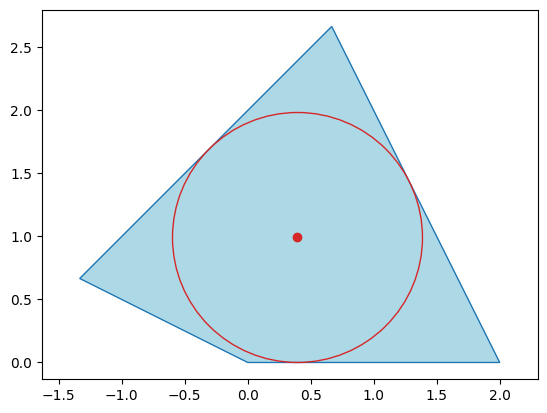

(array([0.3949061 , 0.99200259]), array([0.99200259]))

In [37]:
def find_chebyshev_center(vertices):
    m = gp.Model("matrix1")
    point = m.addMVar(shape=2, name="point")
    r = m.addMVar(shape=1,name="r")
    for vertex1,vertex2 in zip(vertices,vertices[1:]+[vertices[0]]):
        m.addConstr(-((vertex2[0]-vertex1[0])*(point[1]-vertex1[1])-(vertex2[1]-vertex1[1])*(point[0]-vertex1[0]))/((vertex2[0]-vertex1[0])**2+(vertex2[1]-vertex1[1])**2)**0.5 + r<=0)
    m.setObjective(r, GRB.MAXIMIZE)
    m.optimize()
    return point.X, r.X

def find_and_plot_chebyshev_center(vertices):
    point, r = find_chebyshev_center(vertices)
    xs, ys = zip(*(vertices + [vertices[0]])) #create lists of x and y values
    plt.figure()
    plt.axis('equal')
    plt.fill(xs,ys,facecolor='lightblue', edgecolor='tab:blue', linewidth=1)
    cir=plt.Circle((point[0], point[1]), r, fill=False, edgecolor='tab:red')
    plt.gca().add_patch(cir)
    plt.plot(point[0], point[1], 'o', color='tab:red')
    plt.show()
    return point, r

find_and_plot_chebyshev_center(vertices)